<a href="https://colab.research.google.com/github/J1gsy/machine_learning/blob/main/Tugas02_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN


# Preprocessing

In [ ]:
wine_data = pd.read_csv("Datasets/wine-clustering.csv")
wine_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
scaler = StandardScaler()
wine_data_scale = wine_data[['Alcohol', 'Ash', 'Magnesium', 'Color_Intensity']] #scale wine_data menjadi 4 kolom
wine_data_scale

,Alcohol,Ash,Magnesium,Color_Intensity
0,14.23,2.43,127,5.64
1,13.20,2.14,100,4.38
2,13.16,2.67,101,5.68
3,14.37,2.50,113,7.80
4,13.24,2.87,118,4.32
...,...,...,...,...
173,13.71,2.45,95,7.70
174,13.40,2.48,102,7.30
175,13.27,2.26,120,10.20
176,13.17,2.37,120,9.30


In [ ]:
wine_data_scale = scaler.fit_transform(wine_data_scale)
wine_data_scale.shape

(178, 4)

In [ ]:
wine_data_scale[:5]

array([[ 1.51861254,  0.23205254,  1.91390522,  0.25171685],
       [ 0.24628963, -0.82799632,  0.01814502, -0.29332133],
       [ 0.19687903,  1.10933436,  0.08835836,  0.26901965],
       [ 1.69154964,  0.4879264 ,  0.93091845,  1.18606801],
       [ 0.29570023,  1.84040254,  1.28198515, -0.31927553]])

In [ ]:
data = pd.DataFrame(wine_data_scale)
data.rename(columns={0:"Alcohol", 1:"Ash", 2:"Magnesium", 3:"Color_Intensity"}, inplace=True)

data_cluster = data.copy()
data.head()

,Alcohol,Ash,Magnesium,Color_Intensity
0,1.518613,0.232053,1.913905,0.251717
1,0.246290,-0.827996,0.018145,-0.293321
2,0.196879,1.109334,0.088358,0.269020
3,1.691550,0.487926,0.930918,1.186068
4,0.295700,1.840403,1.281985,-0.319276


In [ ]:
data.describe()

,Alcohol,Ash,Magnesium,Color_Intensity
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-8.370333e-16,-3.991813e-17,2.494883e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-3.679162e+00,-2.088255e+00,-1.634288e+00
25%,-7.882448e-01,-5.721225e-01,-8.244151e-01,-7.951025e-01
50%,6.099988e-02,-2.382132e-02,-1.222817e-01,-1.592246e-01
75%,8.361286e-01,6.981085e-01,5.096384e-01,4.939560e-01
max,2.259772e+00,3.156325e+00,4.371372e+00,3.435432e+00


# Kmeans Algorithm

Text(0, 0.5, 'inertia')

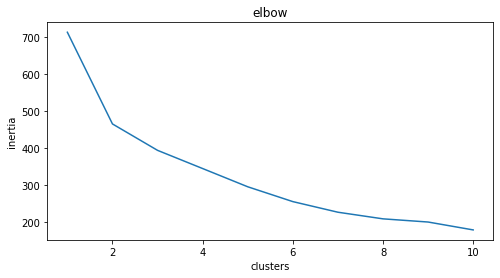

In [ ]:
# buat list inertia
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

#tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

In [ ]:
# Melatih Model

# Create model
model_kmeans3 = KMeans(n_clusters=3)
model_KMeans4 = KMeans(n_clusters=4)


# Train model
model_kmeans3.fit(data)
model_KMeans4.fit(data)

# Menambah label pada data
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_KMeans4.labels_

data_cluster

,Alcohol,Ash,Magnesium,Color_Intensity,cluster_kmeans3,cluster_kmeans4
0,1.518613,0.232053,1.913905,0.251717,1,3
1,0.246290,-0.827996,0.018145,-0.293321,2,1
2,0.196879,1.109334,0.088358,0.269020,1,1
3,1.691550,0.487926,0.930918,1.186068,0,3
4,0.295700,1.840403,1.281985,-0.319276,1,3
...,...,...,...,...,...,...
173,0.876275,0.305159,-0.332922,1.142811,0,0
174,0.493343,0.414820,0.158572,0.969783,0,0
175,0.332758,-0.389355,1.422412,2.224236,0,0
176,0.209232,0.012732,1.422412,1.834923,0,0


/home/risqullah/Coding/machine-learning/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/risqullah/Coding/machine-learning/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


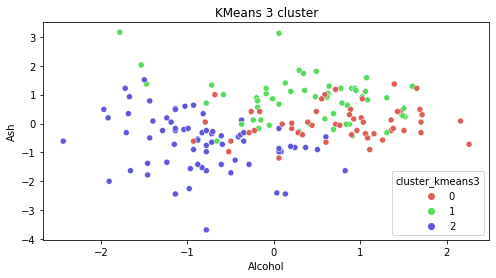

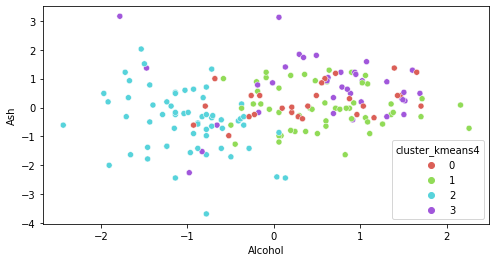

In [ ]:
# Tampilkan plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Alcohol'], data_cluster['Ash'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls', 3))
plt.title("KMeans 3 cluster")

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Alcohol'], data_cluster['Ash'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls', 4))
plt.show()

# Hierarchy

In [ ]:
data

,Alcohol,Ash,Magnesium,Color_Intensity
0,1.518613,0.232053,1.913905,0.251717
1,0.246290,-0.827996,0.018145,-0.293321
2,0.196879,1.109334,0.088358,0.269020
3,1.691550,0.487926,0.930918,1.186068
4,0.295700,1.840403,1.281985,-0.319276
...,...,...,...,...
173,0.876275,0.305159,-0.332922,1.142811
174,0.493343,0.414820,0.158572,0.969783
175,0.332758,-0.389355,1.422412,2.224236
176,0.209232,0.012732,1.422412,1.834923


In [ ]:
## Single Linkage

# In single linkage hierarchical clustering,
# the distance between two clusters is defined as
# the shortest distance between two points in each cluster.
# For example, the distance between clusters “r” and “s” to
# the left is equal to the length of the arrow between their two closest points.

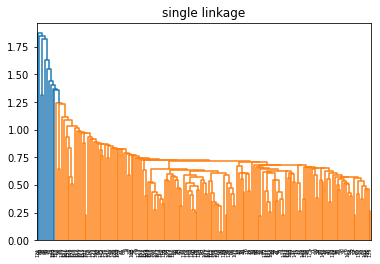

In [ ]:
# single linkage
mergings_single = linkage(data, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.title("single linkage")
plt.show()

In [ ]:
## Complete Linkage

# In complete linkage hierarchical clustering,
# the distance between two clusters is defined as
# the longest distance between two points in each cluster.
# For example, the distance between clusters “r” and “s” to the
# left is equal to the length of the arrow between their two furthest points.

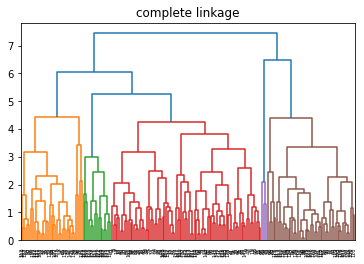

In [ ]:
# complete linkage
mergings_complete = linkage(data, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.title("complete linkage")
plt.show()

In [ ]:
# 3 clusters
cluster_hierarchy = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_hierarchy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
# assign cluster labels
data_cluster['cluster_hierarchy'] = cluster_hierarchy
data_cluster

,Alcohol,Ash,Magnesium,Color_Intensity,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy
0,1.518613,0.232053,1.913905,0.251717,1,3,0
1,0.246290,-0.827996,0.018145,-0.293321,2,1,0
2,0.196879,1.109334,0.088358,0.269020,1,1,0
3,1.691550,0.487926,0.930918,1.186068,0,3,0
4,0.295700,1.840403,1.281985,-0.319276,1,3,0
...,...,...,...,...,...,...,...
173,0.876275,0.305159,-0.332922,1.142811,0,0,0
174,0.493343,0.414820,0.158572,0.969783,0,0,0
175,0.332758,-0.389355,1.422412,2.224236,0,0,0
176,0.209232,0.012732,1.422412,1.834923,0,0,0


/home/risqullah/Coding/machine-learning/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'hierarchical clustering')

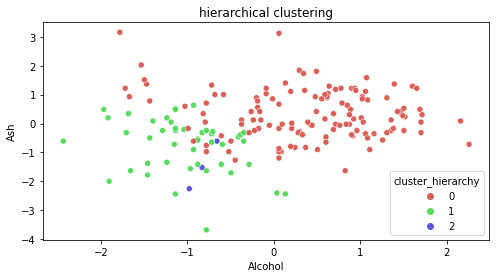

In [ ]:
# tampilkan plot
plt.figure(figsize=(8, 4))
sns.scatterplot(data_cluster['Alcohol'], data_cluster['Ash'], hue=data_cluster['cluster_hierarchy'], palette=sns.color_palette('hls', 3))
plt.title('hierarchical clustering')

# DBScan

In [ ]:
data

,Alcohol,Ash,Magnesium,Color_Intensity
0,1.518613,0.232053,1.913905,0.251717
1,0.246290,-0.827996,0.018145,-0.293321
2,0.196879,1.109334,0.088358,0.269020
3,1.691550,0.487926,0.930918,1.186068
4,0.295700,1.840403,1.281985,-0.319276
...,...,...,...,...
173,0.876275,0.305159,-0.332922,1.142811
174,0.493343,0.414820,0.158572,0.969783
175,0.332758,-0.389355,1.422412,2.224236
176,0.209232,0.012732,1.422412,1.834923


In [ ]:
# create an object
db = DBSCAN(eps=1.2, min_samples=2, metric='euclidean')

#fit the model
db.fit(data)
set(db.labels_)

{-1, 0, 1}

In [ ]:
# assign cluster labels
data_cluster['cluster_dbscan'] = db.labels_
data_cluster

,Alcohol,Ash,Magnesium,Color_Intensity,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy,cluster_dbscan
0,1.518613,0.232053,1.913905,0.251717,1,3,0,0
1,0.246290,-0.827996,0.018145,-0.293321,2,1,0,0
2,0.196879,1.109334,0.088358,0.269020,1,1,0,0
3,1.691550,0.487926,0.930918,1.186068,0,3,0,0
4,0.295700,1.840403,1.281985,-0.319276,1,3,0,0
...,...,...,...,...,...,...,...,...
173,0.876275,0.305159,-0.332922,1.142811,0,0,0,0
174,0.493343,0.414820,0.158572,0.969783,0,0,0,0
175,0.332758,-0.389355,1.422412,2.224236,0,0,0,0
176,0.209232,0.012732,1.422412,1.834923,0,0,0,0


In [ ]:
data_cluster.describe()

,Alcohol,Ash,Magnesium,Color_Intensity,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy,cluster_dbscan
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,178.000000,178.000000,178.000000
mean,-8.382808e-16,-8.370333e-16,-3.991813e-17,2.494883e-17,1.106742,1.601124,0.297753,-0.050562
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,0.826715,0.976214,0.494141,0.266224
min,-2.434235e+00,-3.679162e+00,-2.088255e+00,-1.634288e+00,0.000000,0.000000,0.000000,-1.000000
25%,-7.882448e-01,-5.721225e-01,-8.244151e-01,-7.951025e-01,0.000000,1.000000,0.000000,0.000000
50%,6.099988e-02,-2.382132e-02,-1.222817e-01,-1.592246e-01,1.000000,2.000000,0.000000,0.000000
75%,8.361286e-01,6.981085e-01,5.096384e-01,4.939560e-01,2.000000,2.000000,1.000000,0.000000
max,2.259772e+00,3.156325e+00,4.371372e+00,3.435432e+00,2.000000,3.000000,2.000000,1.000000


/home/risqullah/Coding/machine-learning/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'DBSCAN Clustering')

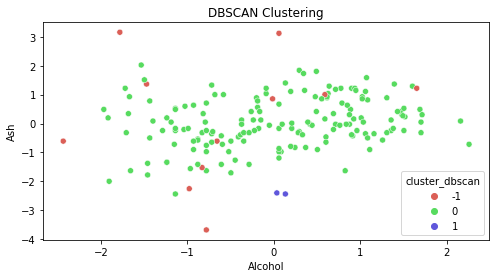

In [ ]:
# tampilkan plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Alcohol'], data_cluster['Ash'], hue=data_cluster['cluster_dbscan'], palette=sns.color_palette('hls',3))
plt.title('DBSCAN Clustering')